In [15]:
# Step 1: Librerie necessarie
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [16]:
# # Step 2: Funzione per calcolo sentiment
# def calculate_sentiment(text):
#     analyzer = SentimentIntensityAnalyzer()
#     scores = analyzer.polarity_scores(text)
#     return scores

In [17]:
# sentences = [
#     # "VADER is smart, handsome, and funny.",  # positive sentence example
#     # "VADER is not smart, handsome, nor funny.",  # negation sentence example
#     # "VADER is smart, handsome, and funny!",  # punctuation emphasis handled correctly (sentiment intensity adjusted)
#     # "VADER is very smart, handsome, and funny.",  # booster words handled correctly (sentiment intensity adjusted)
#     # "VADER is VERY SMART, handsome, and FUNNY.",  # emphasis for ALLCAPS handled
#     # "VADER is VERY SMART, handsome, and FUNNY!!!",  # combination of signals - VADER appropriately adjusts intensity
#     # "VADER is VERY SMART, uber handsome, and FRIGGIN FUNNY!!!",  # booster words & punctuation make this close to ceiling for score
#     # "The book was good.",  # positive sentence
#     # "The book was kind of good.",  # qualified positive sentence is handled correctly (intensity adjusted)
#     # "The plot was good, but the characters are uncompelling and the dialog is not great.",  # mixed negation sentence
#     # "At least it isn't a horrible book.",  # negated negative sentence with contraction
#     # "Make sure you :) or :D today!",  # emoticons handled
#     # "Today SUX!",  # negative slang with capitalization emphasis
#     # "Today only kinda sux! But I'll get by, lol",  # mixed sentiment example with slang and constrastive conjunction "but"
#     # "The weather is lousy today",  # mixed sentiment with contrastive conjunction
#     # "The family adopted those puppies. ",
#     "Last break, I completed all of my homework ahead of time. "
#     "Last night I did a lot of homework. ",
#     "know that I should enter the haunted house at my own risk.",
#     "I love action movies, not boring dramas.",
#     "I watched a movie last night and the actor was good.",
#     "My teacher is a good advisior.",
#     "Alcohol is not always good.",
#     "I tend to exercise after class.",
#     "Last night, there was an accident and traffic was horrible.",
#     "I watched a movie last night. I was really scared.",
#     "My mom is getting old.",
#     "Age isn't important.",
#     "My ancestors are from Germany.",
#     "I watched a movie last night and the actor was good.",
#     "I was picked to join the club. Wow, it was an honor.",
#     "I love riding in airplanes and flying different places.",
#     "My ancestors are from Germany.",
#     "Last night, there was an accident and traffic was horrible.",
#     "My boss works in an office right above me.",
#     "I have an appointment this afternoon with my teacher.",
#     "I asked my teacher for some advice and we had a discussion.",
#     "I noticed my sister acting strange.",
#     "Last night I did a lot of homework.",
#     "My boss works in an office right above me.",
#     "I got a D in the class; I accepted it.",
#     "I watched a movie last night and the actor was good.",
#     "I noticed my sister acting strange.",
#     "I love action movies, not boring dramas.",
#     "I asked my teacher for some advice and we had a discussion.",
#     "My teacher is a good advisior.",
#     "I watched a movie last night. I was really scared.",
#     "This afternoon I'm going to the store.",
# ]

In [18]:
# # Step 3: Estrarre punteggi di sentiment
# analyzer = SentimentIntensityAnalyzer()
# for sentence in sentences:
#     vs = analyzer.polarity_scores(sentence)
#     print("{:-<65} {}".format(sentence, str(vs)))

In [19]:
# Script per leggere il file Excel e creare un mapping tra nomi video e captions
import pandas as pd
import os

# Percorso del file Excel
excel_path = "../data/raw/how2sign_val.xlsx"
video_folder = "../data/raw/raw_videos"

# Legge il file Excel
print("Leggendo il file Excel...")
df = pd.read_excel(excel_path)

# Mostra le prime righe per capire la struttura
# print("Prime 5 righe del dataset:")
# print(df.head())
print(f"\nColonne disponibili: {list(df.columns)}")
print(f"Numero totale di righe: {len(df)}")

# Estrae le frasi (assumendo che sia l'ultima colonna)
sentences = df.iloc[:, -1].dropna().tolist()

# Assumendo che ci sia una colonna con i nomi dei video
if "SENTENCE_NAME" in df.columns:
    video_names = df["SENTENCE_NAME"].dropna().tolist()

# Filtra i video che esistono nella cartella raw_videos
existing_videos = set(os.listdir(video_folder))
video_caption_mapping = {}
for i, (video, caption) in enumerate(zip(video_names, sentences)):
    video_file = f"{video}.mp4"
    if video_file in existing_videos and pd.notna(caption):
        video_caption_mapping[video] = caption

print(
    f"\nCreato mapping per {len(video_caption_mapping)} video-caption pairs (solo video esistenti)"
)
print("Esempi di mapping:")
for i, (video, caption) in enumerate(list(video_caption_mapping.items())[:3]):
    print(f"{i+1}. Video: {video}")
    print(f"   Caption: {caption[:100]}...")

Leggendo il file Excel...

Colonne disponibili: ['VIDEO_ID', 'VIDEO_NAME', 'SENTENCE_ID', 'SENTENCE_NAME', 'START', 'END', 'SENTENCE']
Numero totale di righe: 1741

Creato mapping per 1739 video-caption pairs (solo video esistenti)
Esempi di mapping:
1. Video: -d5dN54tH2E_0-1-rgb_front
   Caption: We're going to work on a arm drill that will help you have graceful hand movements in front of you....
2. Video: -d5dN54tH2E_1-1-rgb_front
   Caption: I call it painting the wall....
3. Video: -d5dN54tH2E_10-1-rgb_front
   Caption: So we're going to go up and down...


Distribuzione sentiment:
Positive: 617 esempi
Negative: 140 esempi
Neutral: 982 esempi
Totale: 1739 esempi

Esempi positivi:
Video: -d5dN54tH2E_0-1-rgb_front, Caption: We're going to work on a arm drill that will help you have graceful hand movements in front of you....
Video: -d5dN54tH2E_11-1-rgb_front, Caption: And just let those fingers relax....
Video: -d5dN54tH2E_13-1-rgb_front, Caption: Do it very mechanically at first and then slowly soften it out as you feel comfortable....

Esempi negativi:
Video: -f1_kdl050s_0-1-rgb_front, Caption: In this clip we are going to talk about dangers for these birds in the household and otherwise....
Video: -f1_kdl050s_1-1-rgb_front, Caption: The number one loss for these birds, is flight....
Video: -f1_kdl050s_11-1-rgb_front, Caption: It seems to be the number one way to loose them....

Esempi neutri:
Video: -d5dN54tH2E_1-1-rgb_front, Caption: I call it painting the wall....
Video: -d5dN54tH2E_10-1-rgb_front, Caption: So we're going to go up and 

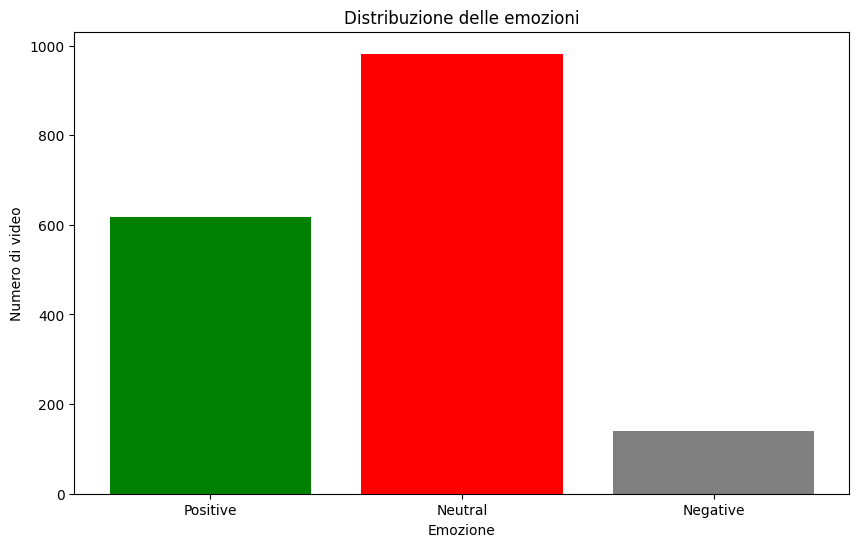

In [20]:
# Step 4: Calcola sentiment per ogni video-caption pair e organizza per categorie
import matplotlib.pyplot as plt
from collections import Counter

analyzer = SentimentIntensityAnalyzer()

# Calcola il sentiment per ogni caption
video_sentiment_data = []
for video_name, caption in video_caption_mapping.items():
    scores = analyzer.polarity_scores(caption)
    compound_score = scores["compound"]

    # Determina la categoria
    if compound_score >= 0.25:
        category = "Positive"
    elif compound_score <= -0.25:
        category = "Negative"
    else:
        category = "Neutral"

    video_sentiment_data.append(
        {
            "video_name": video_name,
            "caption": caption,
            "compound_score": compound_score,
            "category": category,
            "scores": scores,
        }
    )

# Organizza per categoria
positive_examples = [
    item for item in video_sentiment_data if item["category"] == "Positive"
]
negative_examples = [
    item for item in video_sentiment_data if item["category"] == "Negative"
]
neutral_examples = [
    item for item in video_sentiment_data if item["category"] == "Neutral"
]

# Conta le occorrenze
category_counts = Counter([item["category"] for item in video_sentiment_data])

print(f"Distribuzione sentiment:")
print(f"Positive: {len(positive_examples)} esempi")
print(f"Negative: {len(negative_examples)} esempi")
print(f"Neutral: {len(neutral_examples)} esempi")
print(f"Totale: {len(video_sentiment_data)} esempi")

# Mostra esempi per ogni categoria
print("\nEsempi positivi:")
for example in positive_examples[:3]:
    print(f"Video: {example['video_name']}, Caption: {example['caption'][:100]}...")

print("\nEsempi negativi:")
for example in negative_examples[:3]:
    print(f"Video: {example['video_name']}, Caption: {example['caption'][:100]}...")

print("\nEsempi neutri:")
for example in neutral_examples[:3]:
    print(f"Video: {example['video_name']}, Caption: {example['caption'][:100]}...")

# Crea il grafico
plt.figure(figsize=(10, 6))
plt.bar(
    category_counts.keys(), category_counts.values(), color=["green", "red", "gray"]
)
plt.title("Distribuzione delle emozioni")
plt.xlabel("Emozione")
plt.ylabel("Numero di video")
plt.show()

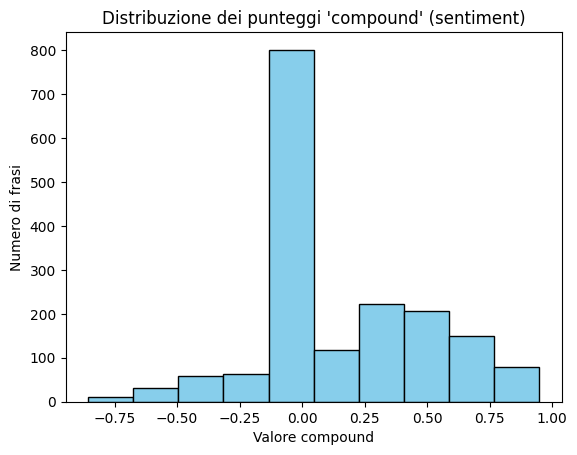

In [21]:
# Estrai tutti i valori 'compound'
compound_scores = [res["compound"] for res in results]

# Crea l'istogramma
plt.hist(compound_scores, bins=10, color="skyblue", edgecolor="black")
plt.title("Distribuzione dei punteggi 'compound' (sentiment)")
plt.xlabel("Valore compound")
plt.ylabel("Numero di frasi")
plt.show()